## 2.2 Interviewing Robots
### Mindmap based on the interview

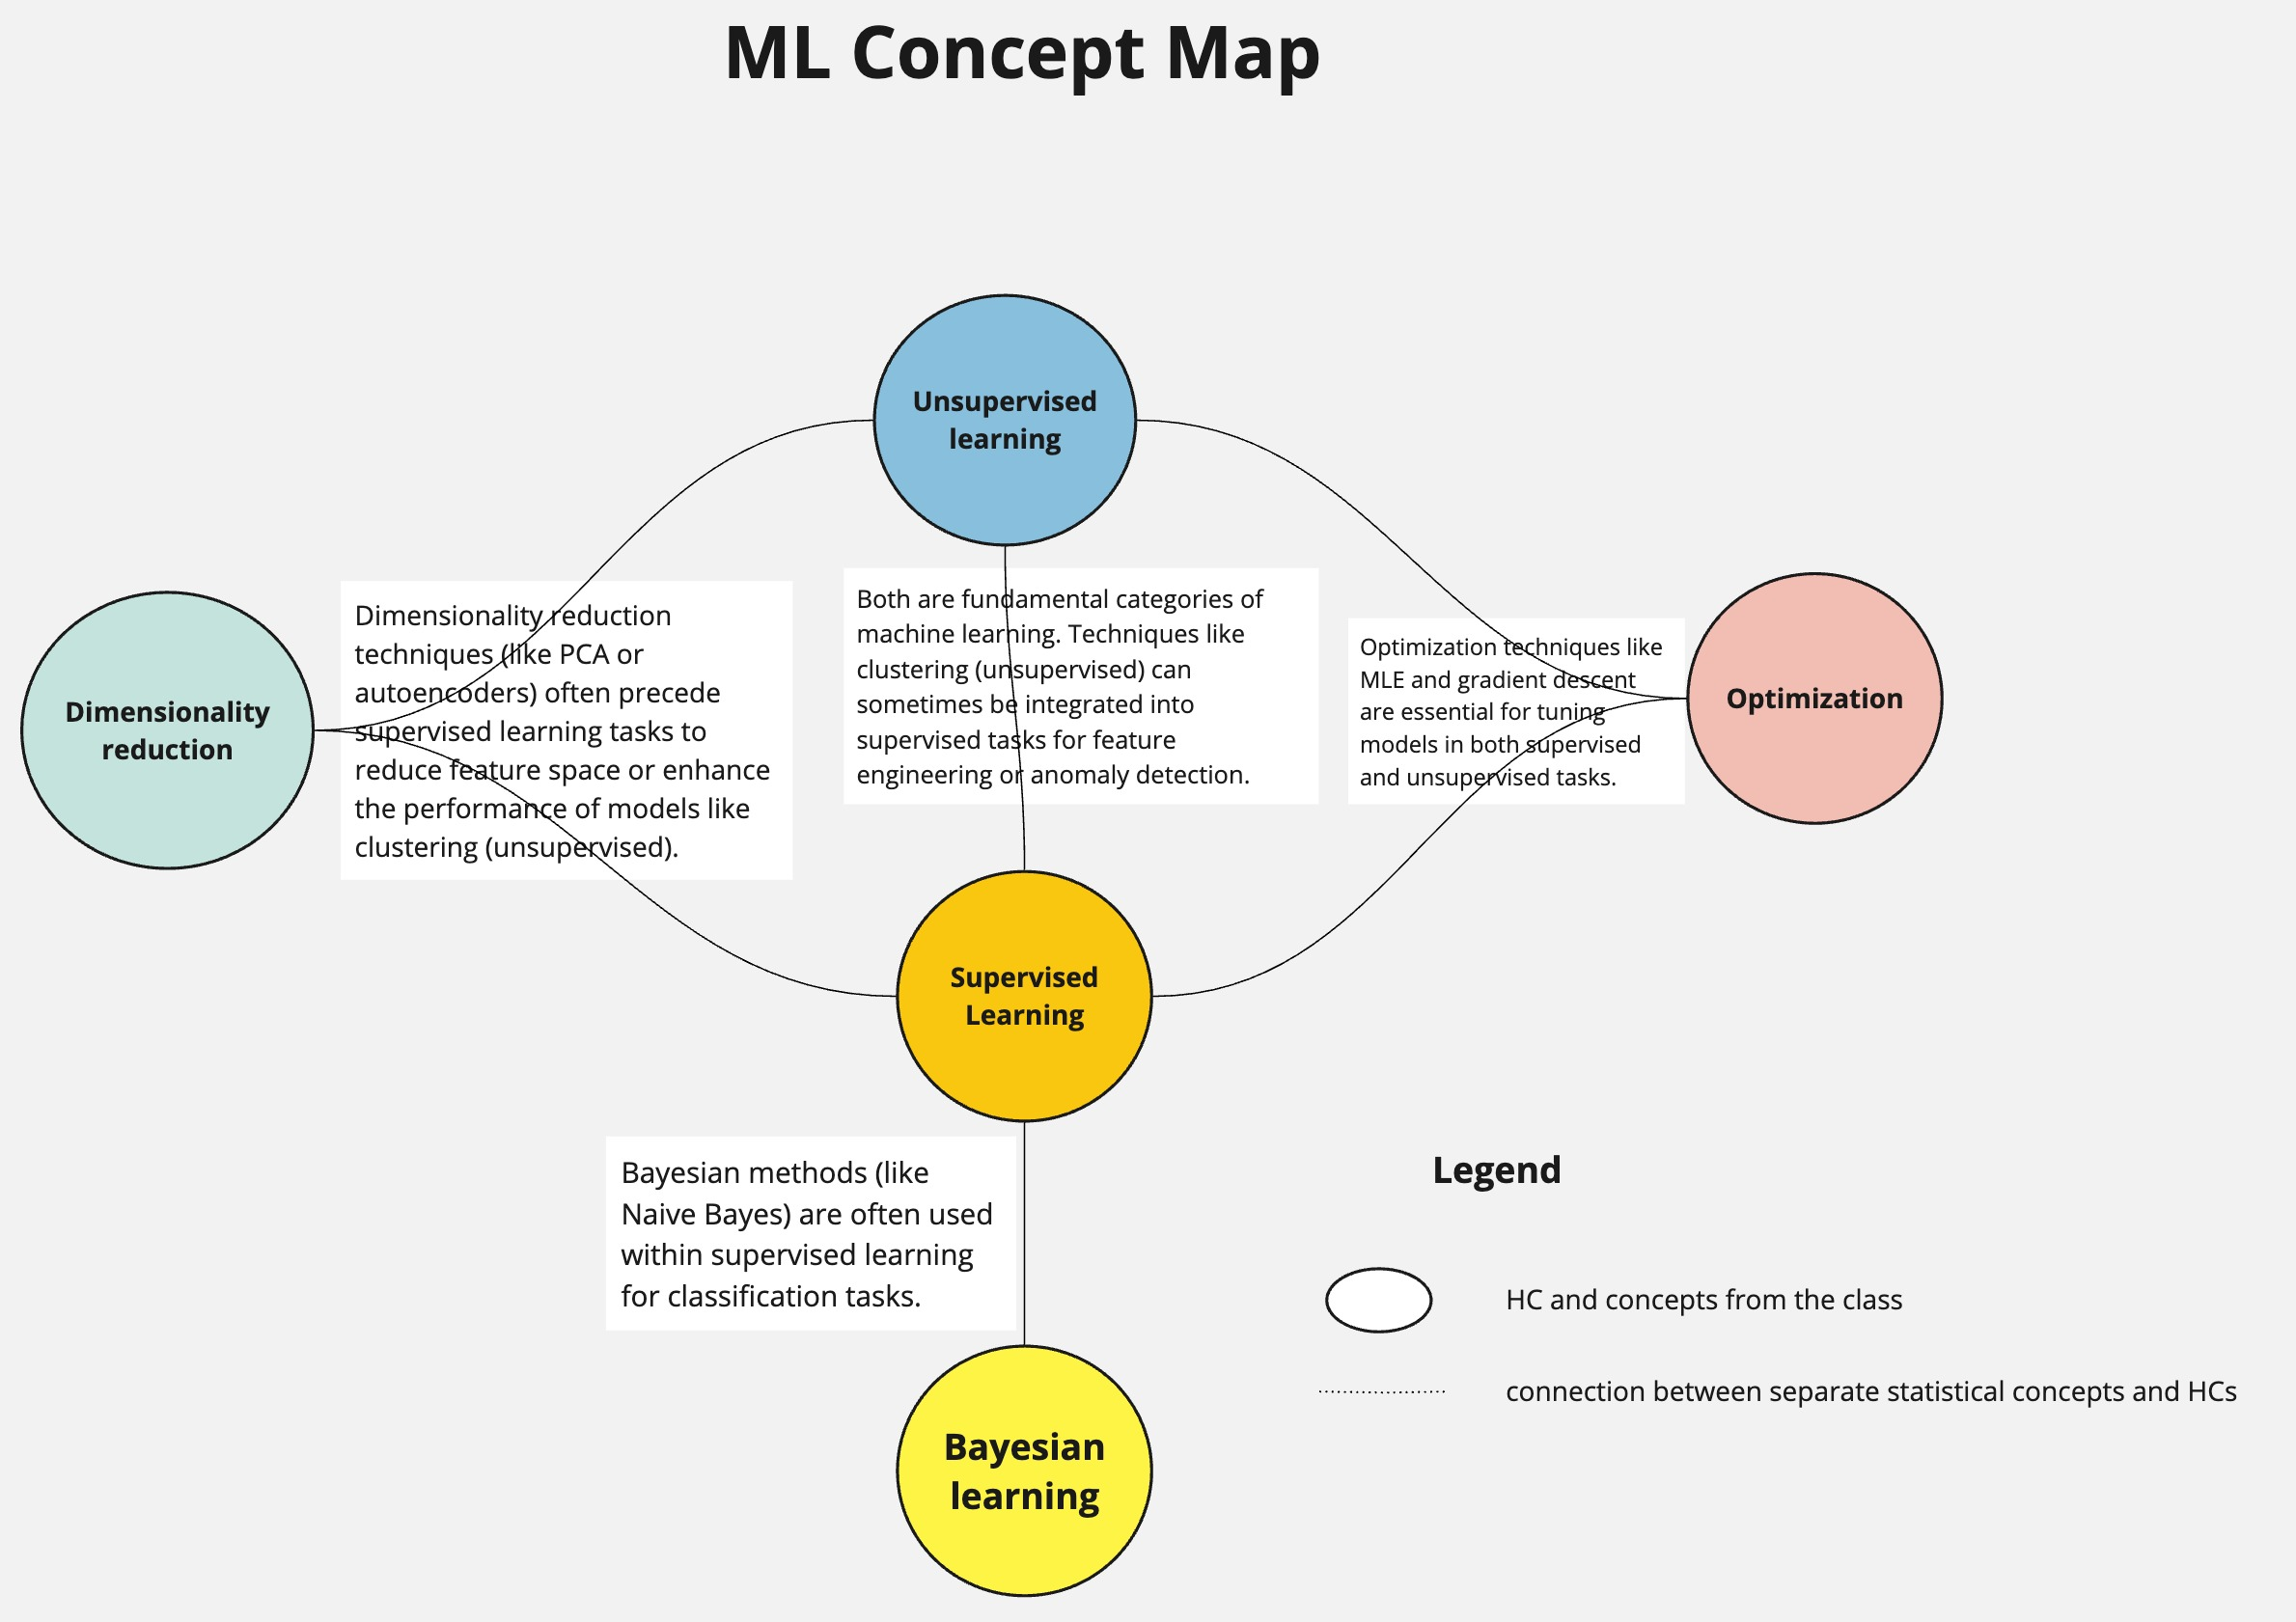

In [48]:
from IPython.display import Image, display
image_path = 'GPT.jpg'
display(Image(filename=image_path))

## 3.1 Mind Map

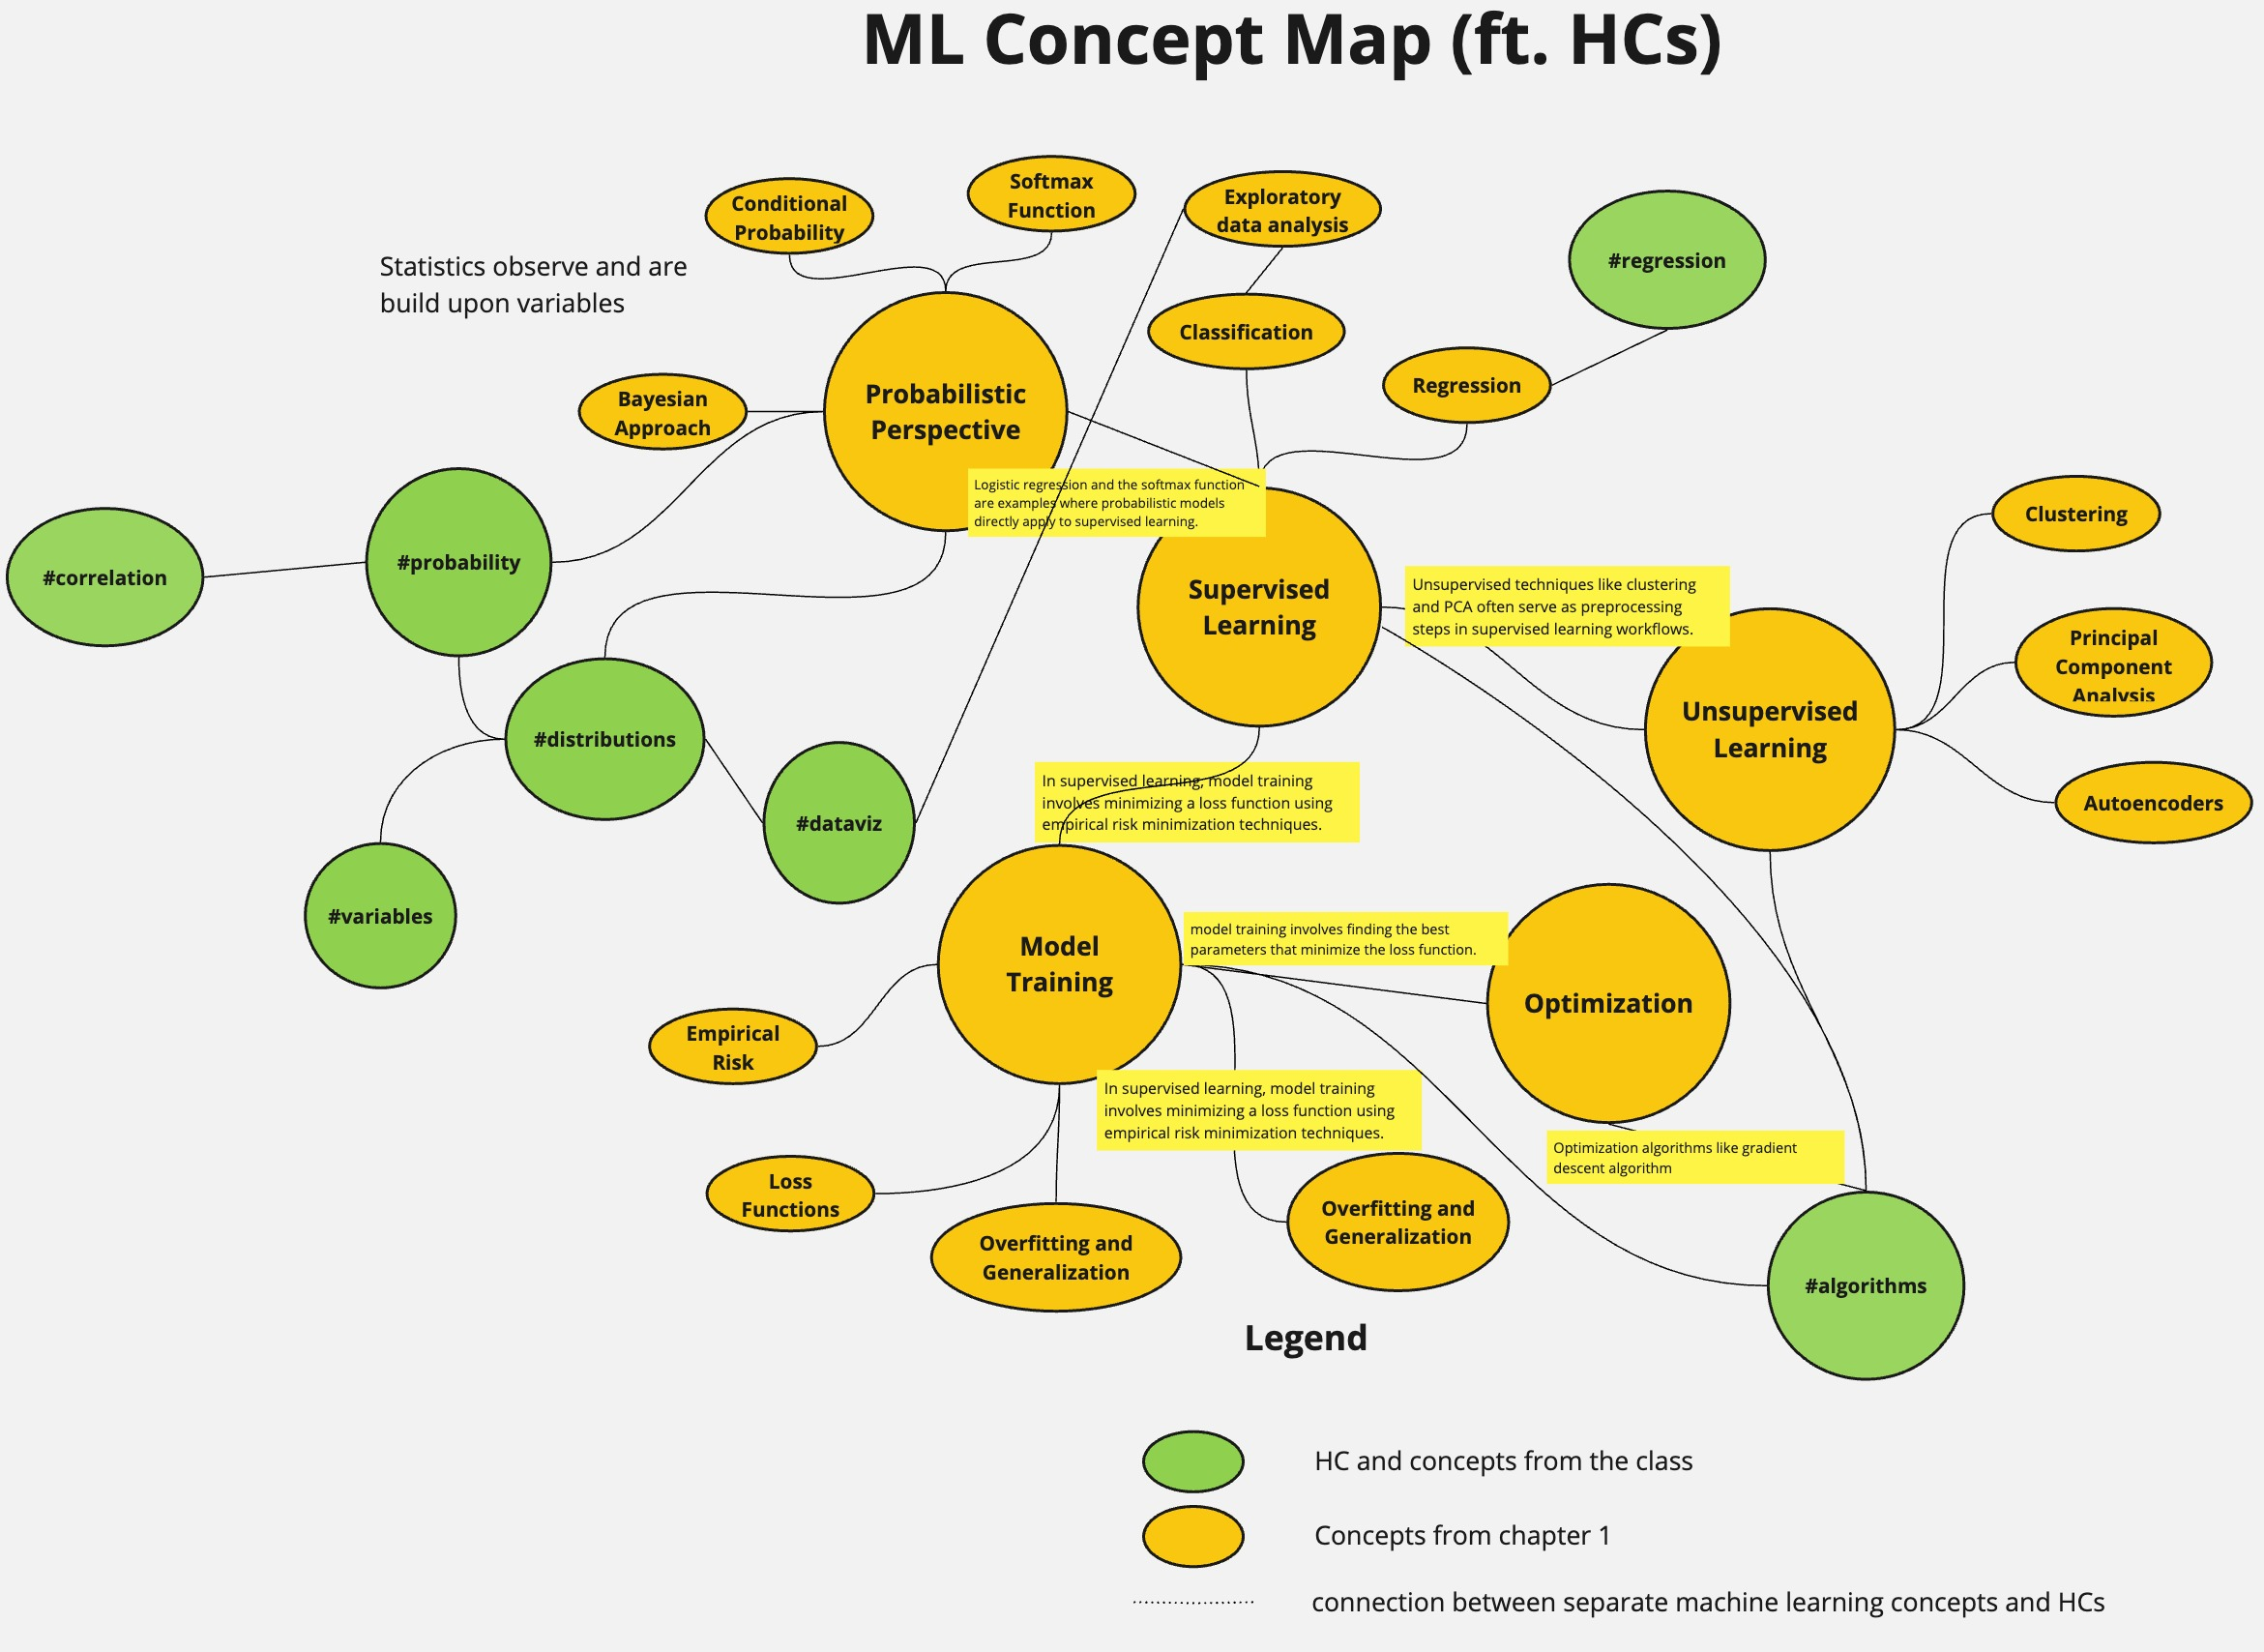

In [51]:
from IPython.display import Image, display
image_path = 'ML Concept Map.jpg'
display(Image(filename=image_path))

In [53]:
## 3.2 Code Practice

### Script 1 - Load, clean, and visualize the Iris data set.
Load the Iris data set into a pandas data frame.
Drop all rows where the septal length is great than 5.  
Scatter plot petal v. septal length with each dot color-coded by the species of iris.
Add comments explaining each step in real terms: i.e., explain to a reader what and iris is, what a septal length is, what the units on the numbers are and what your filtering script is accomplishing.

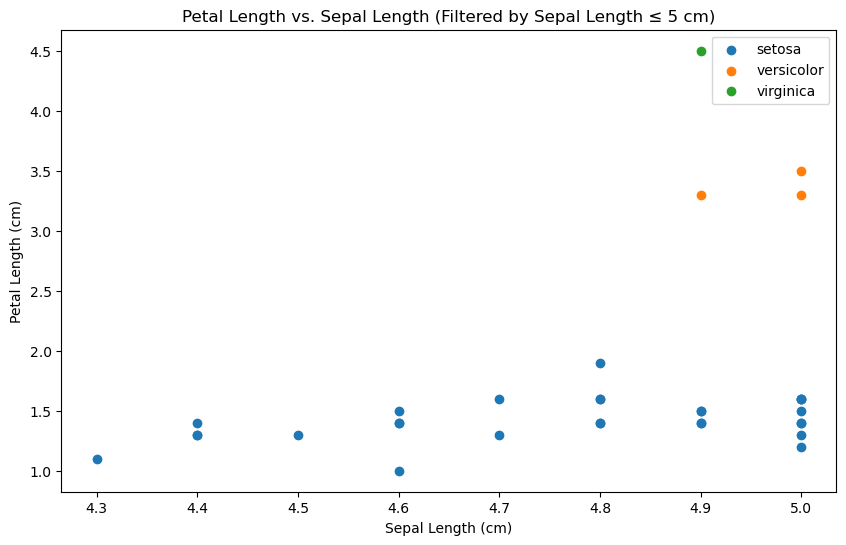

In [61]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset into a pandas DataFrame
# The Iris dataset contains measurements of three different types of iris flowers: Setosa, Versicolor, and Virginica
# These measurements include the length and width of the petals and sepals (the outer parts of the flower).
iris = load_iris()

# Creating a DataFrame from the data
# Each row represents an individual iris flower, and the columns contain the measurements.
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Adding the species information to the DataFrame
# The target values (0, 1, 2) represent the three species of iris flowers.
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Dropping rows where the sepallength (sepal length) is greater than 5
# The 'sepal' is the part of the flower that encases and protects the developing bud. The length is measured in centimeters.
# Here, we remove rows where the sepal length exceeds 5 cm to narrow down the dataset for visualization purposes.
filtered_df = iris_df[iris_df['sepal length (cm)'] <= 5]

# Create a scatter plot of petal length vs sepal length
# We're color-coding each point by the species of iris. This helps us see if there's a pattern in the sizes of different species.
plt.figure(figsize=(10, 6))

# Scatter plot where the x-axis represents the sepal length and the y-axis represents the petal length.
# The dots are color-coded by species to show which type of iris flower the measurement comes from.
for species in filtered_df['species'].unique():
    species_data = filtered_df[filtered_df['species'] == species]
    plt.scatter(species_data['sepal length (cm)'], species_data['petal length (cm)'], label=species)
 
# Labeling the axes to indicate what we're plotting
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Petal Length vs. Sepal Length (Filtered by Sepal Length ≤ 5 cm)')
plt.legend()
plt.show()


### Script 2 -  Load, clean, and visualize the MNIST handwritten digits data set.
Load the MNIST data set into a pandas data frame.
Drop all digits except 3 and 8.
Visualize an array of MNIST digits so you can see some of the variation in the writing.
Add comments explaining each step in real terms: i.e., what are these images? How are they stored? What is the plotting function doing. 

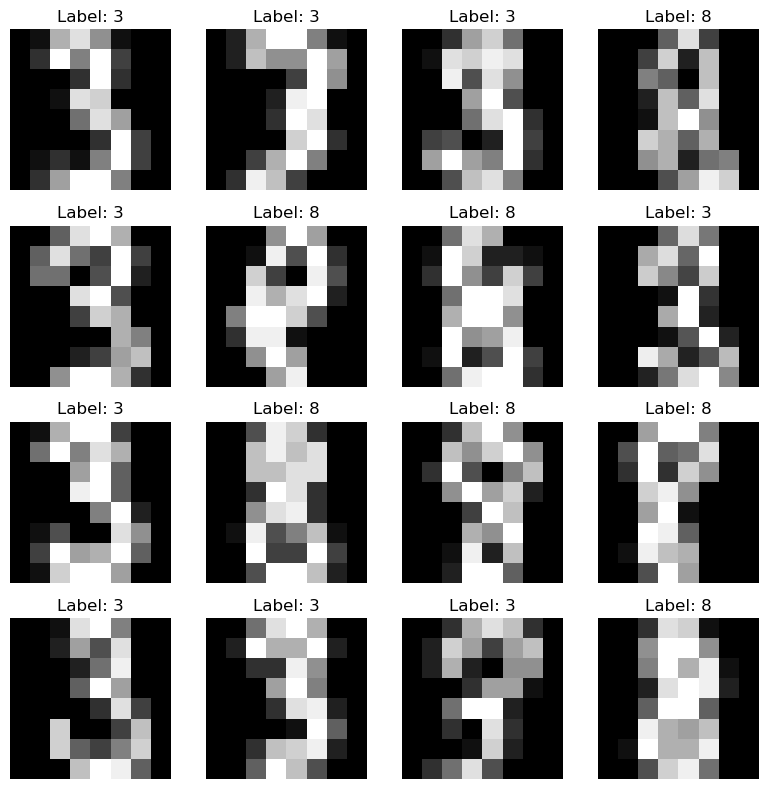

In [27]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import numpy as np

# Load the digits dataset (similar to MNIST but smaller)
digits = load_digits()

# Convert to DataFrame
digits_data = pd.DataFrame(digits.data)
digits_data['label'] = digits.target

# Filter to only include the digits 3 and 8
filtered_digits_data = digits_data[(digits_data['label'] == 3) | (digits_data['label'] == 8)]

# Define the function to visualize the digits
def plot_mnist_digits(data, labels, num_images=16):
    # Select random images from the dataset
    indices = np.random.choice(data.index, num_images, replace=False)
    selected_images = data.loc[indices].values
    selected_labels = labels.loc[indices].values

    # Set up the plotting grid
    fig, axes = plt.subplots(4, 4, figsize=(8, 8))
    axes = axes.ravel()

    # Plot each image in the grid
    for i in range(num_images):
        axes[i].imshow(selected_images[i].reshape(8, 8), cmap='gray')
        axes[i].set_title(f'Label: {selected_labels[i]}')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Visualize the filtered digits (3 and 8)
plot_mnist_digits(filtered_digits_data.drop(columns=['label']), filtered_digits_data['label'])


## Mastery
### 4.1 Stat questions
#### 1. Chance Guessing
 In a test of ‘psychometry’ the car keys and wrist watches of 5 people are given to a medium. The medium then attempts to match the wrist watch with the car key of each person. What is the expected number of correct matches that the medium will make (by chance)? What is the probability that the medium will obtain at least 1 correct match? Show your work. 

In a test of 'psychometry', car keys and wrist watches of 5 people are given to a medium. The medium attempts to match each wrist watch with its corresponding car key. We assume each match is a random guess.

### Expected Number of Correct Matches

- Each guess has a 1/5 probability of being correct because there are 5 watches and 5 keys, making the chance of any one watch matching its corresponding key 1 out of 5.
- Since there are 5 people, and each guess is independent, the expected number of correct matches is calculated as:
  - Expected number = Number of trials * Probability of success in each trial
  - Expected number = 5 * (1/5) = 1

Thus, the expected number of correct matches that the medium will make by chance is 1.

### Probability of Obtaining At Least One Correct Match

To find the probability that the medium will get at least one match correct, we look at the complement of the event that no matches are correct.

- The probability of no correct match for one trial is 4/5 (since getting it wrong has 4 other options).
- The event of getting all guesses wrong for all 5 people would then be (4/5) raised to the power of 5.
- Thus, the probability of no correct matches is:
  - (4/5)^5 = 0.32768

To find the probability of getting at least one correct match, we subtract the probability of no correct matches from 1:
  - Probability of at least one correct match = 1 - (4/5)^5 = 1 - 0.32768 = 0.67232

Thus, the probability that the medium will obtain at least one correct match by chance is approximately 0.67232.


#### 2. Bayesian Calculations
Given two urns, A and B:
A has 12 Red balls in it, and 3 Green balls in it
B has 6 Red balls in it, and 9 Green balls in it
You are blindfolded and given an unknown urn. Each urn has been shaken so that the balls’ positions inside the urn can be assumed to be completely unknown.
Questions:
If you reach in and draw out a red ball, what is the probability that you were given urn A?
Assuming that you’ve drawn one red ball, what is the probability of drawing another red ball if reaching into the same (unknown) urn?

i. Probability that you were given urn A given that a red ball is drawn
To solve this, we apply Bayes' Theorem:

Probability of picking urn A (P(A)): 1/2 (since there's an equal chance to pick either urn).
Probability of drawing a red ball from urn A (P(Red | A)): Urn A has 12 red balls and 3 green balls, making it 12/15 or 4/5.
Overall probability of drawing a red ball (P(Red)): This is calculated by adding the probability of drawing a red from each urn, each weighted by the likelihood of choosing that urn.
Probability of drawing a red ball from urn B (P(Red | B)): Urn B has 6 red balls and 9 green balls, which is 6/15 or 2/5.
The calculation for the overall red drawing probability:
P(Red) = (P(Red | A) * P(A)) + (P(Red | B) * P(B))
P(Red) = (4/5 * 1/2) + (2/5 * 1/2)
P(Red) = 4/10 + 2/10
P(Red) = 6/10 or 3/5
Using Bayes' theorem:

P(A | Red) = (P(Red | A) * P(A)) / P(Red)
P(A | Red) = (4/5 * 1/2) / (3/5)
P(A | Red) = 4/10 / 3/5
P(A | Red) = 4/10 * 5/3
P(A | Red) = 2/3
Thus, if a red ball is drawn, the probability that it was from urn A is 2/3.

ii. Probability of drawing another red ball from the same urn, given that one red ball was already drawn
To calculate this:

We use the updated probabilities after drawing the first red ball:

From urn A: Initially 12 red out of 15 total, after one red draw, it becomes 11 red out of 14.
From urn B: Initially 6 red out of 15 total, after one red draw, it becomes 5 red out of 14.
The probability of drawing another red ball considering the first was red (P(Red2 | Red1)) is a weighted probability based on which urn we might have:

P(Red2 | Red1) = P(Red2 | Red1, A) * P(A | Red1) + P(Red2 | Red1, B) * P(B | Red1)
P(Red2 | Red1, A) = 11/14 (chance of second red from A after first red is also from A)
P(Red2 | Red1, B) = 5/14 (chance of second red from B after first red is also from B)
We already know P(A | Red1) = 2/3 and P(B | Red1) = 1/3 (complementary to P(A | Red1))
Putting these together:

P(Red2 | Red1) = (11/14 * 2/3) + (5/14 * 1/3)
P(Red2 | Red1) = 22/42 + 5/42
P(Red2 | Red1) = 27/42 or about 0.643
Therefore, the probability of drawing another red ball after already drawing one, assuming the same unknown urn, is approximately 0.643.